# Setup

In [1]:
import pandas as pd
from scipy import stats

In [2]:
import seaborn as sns

In [3]:
import numpy as np

# Laod Data

In [4]:
filename = './output02.csv'
df = pd.read_csv(filename, header=0, index_col=0)
df.head()

,IOS_score,IOS_group,wc_self,wc_target,wc_intercept,Overlap_score,word_vec_avg_self,word_vec_avg_target,_merge,euclidean_distance,manhattan_distance,cosine_similarity
MID,,,,,,,,,,,,
3,2,LowIOS,1,3,0,0.0,[-0.12244472 0.08506945 0.37974653 0.122191...,[ 0.19716756 -0.0361397 0.15518795 -0.020858...,both,1.060905,6.054018,0.314
11,2,LowIOS,2,1,0,0.0,[ 0.04351013 0.11613788 0.21674304 0.083413...,[-0.13583325 -0.08001383 0.00602891 0.204291...,both,1.276842,7.305904,-0.003
13,6,HighIOS,2,2,0,0.0,[ 0.19982255 -0.03531588 0.13910446 0.067044...,[ 0.11387488 -0.01635743 0.12364909 0.027848...,both,0.869716,5.261780,0.458
17,3,LowIOS,3,3,0,0.0,[ 0.0156634 0.02954146 0.21260196 0.032229...,[ 0.06801441 -0.04085417 -0.0391719 0.104074...,both,0.731366,4.003384,0.481
32,3,LowIOS,2,1,0,0.0,[ 0.14021084 -0.0647112 0.11865894 -0.035435...,[ 0.08164208 -0.05673673 0.0160316 0.114906...,both,0.929740,5.272175,0.508


In [5]:
df = df.dropna()
df.head()

,IOS_score,IOS_group,wc_self,wc_target,wc_intercept,Overlap_score,word_vec_avg_self,word_vec_avg_target,_merge,euclidean_distance,manhattan_distance,cosine_similarity
MID,,,,,,,,,,,,
3,2,LowIOS,1,3,0,0.0,[-0.12244472 0.08506945 0.37974653 0.122191...,[ 0.19716756 -0.0361397 0.15518795 -0.020858...,both,1.060905,6.054018,0.314
11,2,LowIOS,2,1,0,0.0,[ 0.04351013 0.11613788 0.21674304 0.083413...,[-0.13583325 -0.08001383 0.00602891 0.204291...,both,1.276842,7.305904,-0.003
13,6,HighIOS,2,2,0,0.0,[ 0.19982255 -0.03531588 0.13910446 0.067044...,[ 0.11387488 -0.01635743 0.12364909 0.027848...,both,0.869716,5.261780,0.458
17,3,LowIOS,3,3,0,0.0,[ 0.0156634 0.02954146 0.21260196 0.032229...,[ 0.06801441 -0.04085417 -0.0391719 0.104074...,both,0.731366,4.003384,0.481
32,3,LowIOS,2,1,0,0.0,[ 0.14021084 -0.0647112 0.11865894 -0.035435...,[ 0.08164208 -0.05673673 0.0160316 0.114906...,both,0.929740,5.272175,0.508


# Descriptive Statistics on Overlap Score

In [6]:
# Low IOS Group
df.loc[df['IOS_group'] == 'LowIOS', ['Overlap_score']].describe().T

,count,mean,std,min,25%,50%,75%,max
Overlap_score,23.0,0.085507,0.157257,0.0,0.0,0.0,0.1,0.5


In [7]:
# High IOS Group
df.loc[df['IOS_group'] == 'HighIOS', ['Overlap_score']].describe().T

,count,mean,std,min,25%,50%,75%,max
Overlap_score,14.0,0.075085,0.114595,0.0,0.0,0.0,0.138393,0.333333


# Visualization

## Overlapping Score

### Overlapping Score: Histogram

array([<Axes: title={'center': 'HighIOS'}>,
       <Axes: title={'center': 'LowIOS'}>], dtype=object)

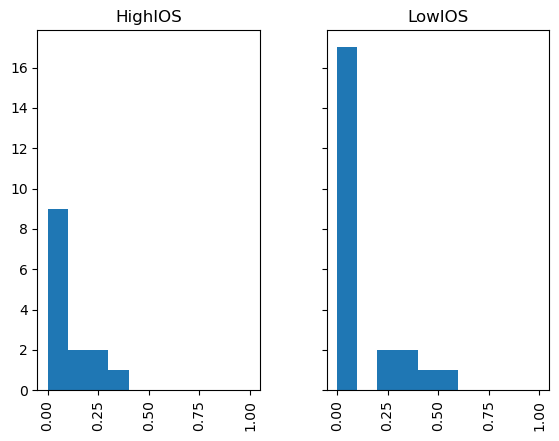

In [8]:
df['Overlap_score'].hist(by=df['IOS_group'], range=[0, 1], sharey=True)

### Overlapping Score: Boxplot

<Axes: title={'center': 'Overlap_score'}, xlabel='[IOS_group]'>

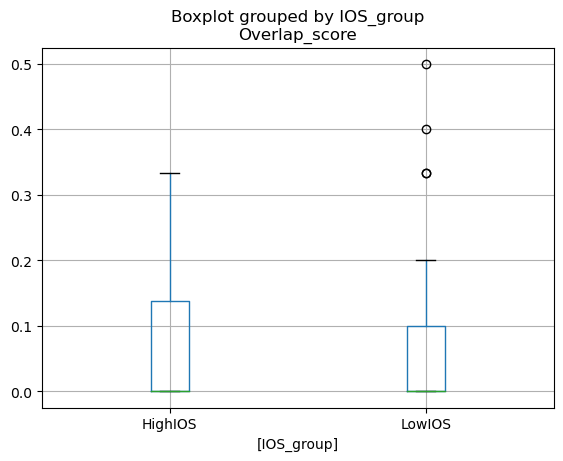

In [9]:
df.boxplot(column=['Overlap_score'], by=['IOS_group'])

### Overlapping Score: Scatter plot

<Axes: xlabel='Overlap_score', ylabel='IOS_score'>

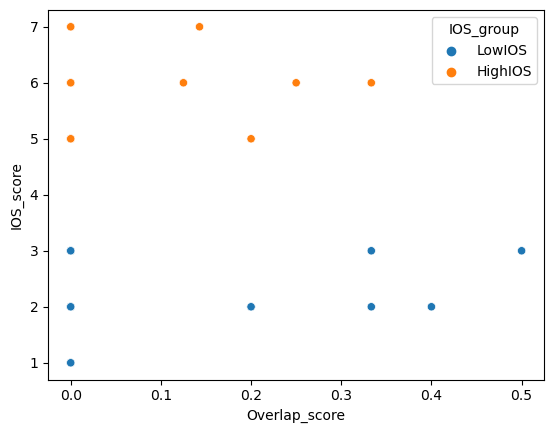

In [10]:
sns.scatterplot(x='Overlap_score', y='IOS_score', hue='IOS_group', data=df)

## Euclidean Distance

### Euclidean Distance: Histogram

array([<Axes: title={'center': 'HighIOS'}>,
       <Axes: title={'center': 'LowIOS'}>], dtype=object)

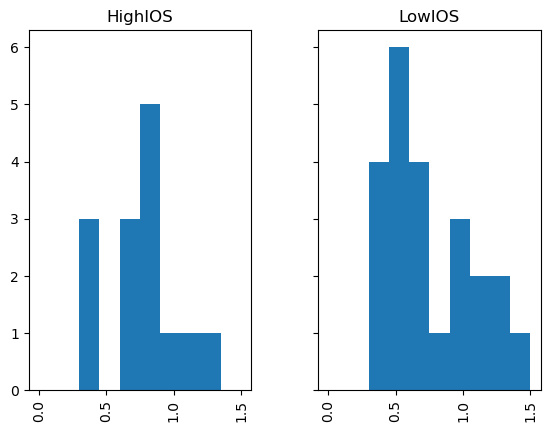

In [11]:
df['euclidean_distance'].hist(by=df['IOS_group'], range=[0, 1.5], sharey=True)

### Euclidean Distance: Boxplot

<Axes: title={'center': 'euclidean_distance'}, xlabel='[IOS_group]'>

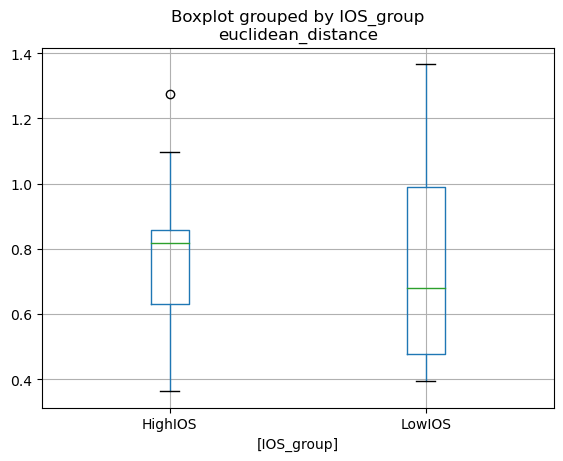

In [12]:
df.boxplot(column=['euclidean_distance'], by=['IOS_group'])

### Euclidean Distance: Scatter plot

<Axes: xlabel='euclidean_distance', ylabel='IOS_score'>

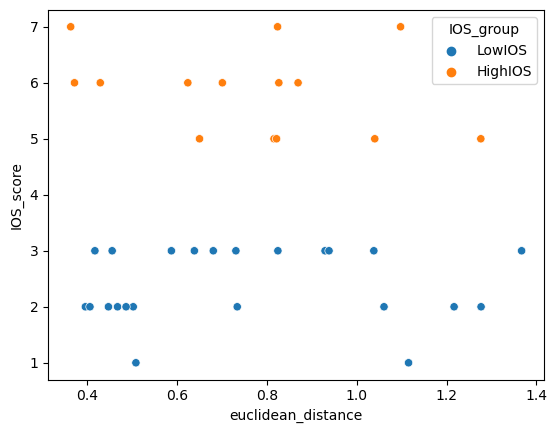

In [13]:
sns.scatterplot(x='euclidean_distance', y='IOS_score', hue='IOS_group', data=df)

## Manhattan Distance

### Manhattan Distance: Histogram

array([<Axes: title={'center': 'HighIOS'}>,
       <Axes: title={'center': 'LowIOS'}>], dtype=object)

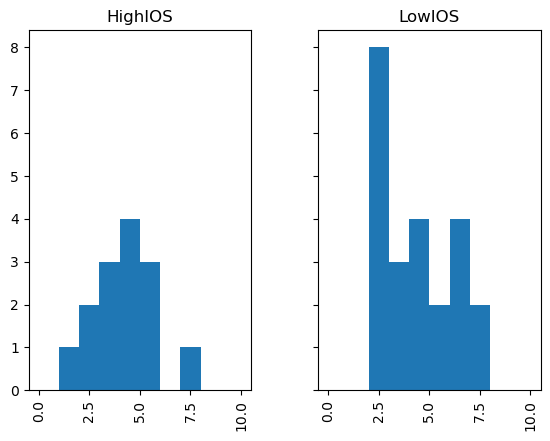

In [14]:
df['manhattan_distance'].hist(by=df['IOS_group'], range=[0, 10], sharey=True)

### Manhattan Distance: Boxplot

<Axes: title={'center': 'manhattan_distance'}, xlabel='[IOS_group]'>

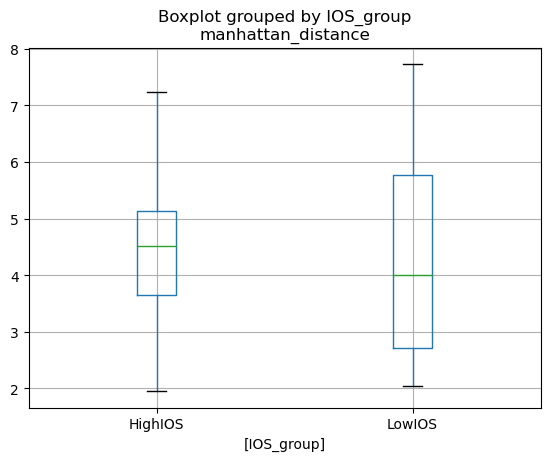

In [15]:
df.boxplot(column=['manhattan_distance'], by=['IOS_group'])

### Manhattan Distance: Scatter plot

<Axes: xlabel='manhattan_distance', ylabel='IOS_score'>

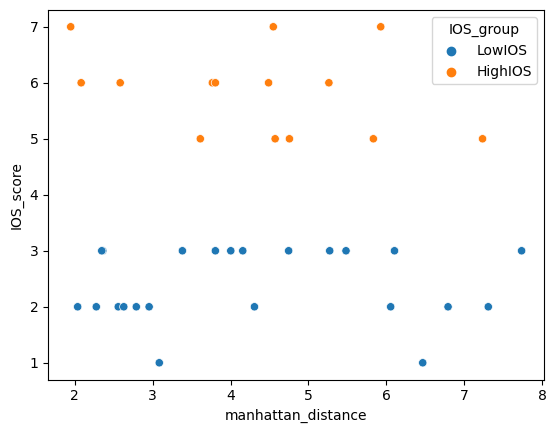

In [16]:
sns.scatterplot(x='manhattan_distance', y='IOS_score', hue='IOS_group', data=df)

## Cosine Similarity

### Cosine Similarity: Histogram

array([<Axes: title={'center': 'HighIOS'}>,
       <Axes: title={'center': 'LowIOS'}>], dtype=object)

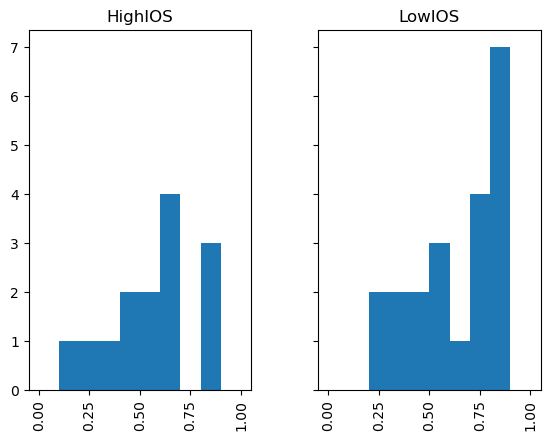

In [17]:
df['cosine_similarity'].hist(by=df['IOS_group'], range=[0, 1], sharey=True)

### Cosine Similarity: Boxplot

<Axes: title={'center': 'cosine_similarity'}, xlabel='[IOS_group]'>

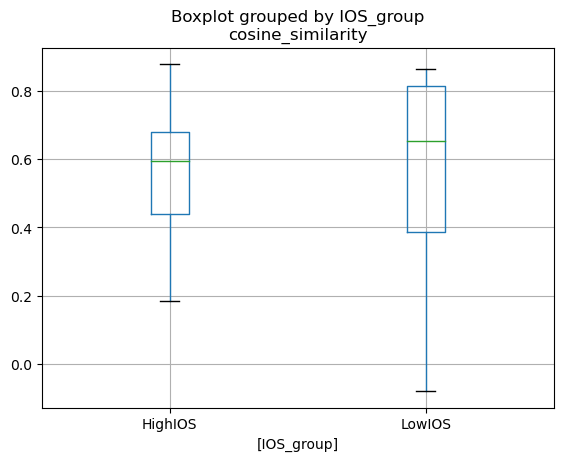

In [18]:
df.boxplot(column=['cosine_similarity'], by=['IOS_group'])

### Cosine Similarity: Scatter plot

<Axes: xlabel='cosine_similarity', ylabel='IOS_score'>

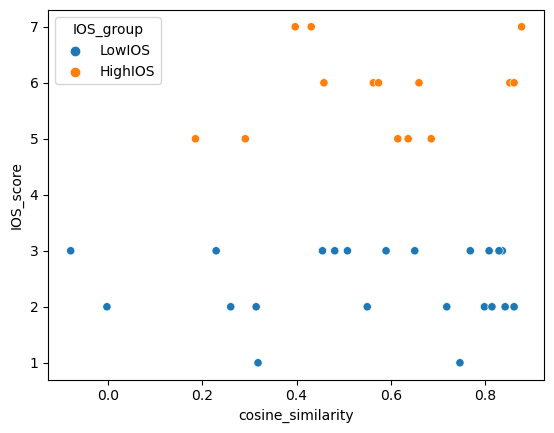

In [19]:
sns.scatterplot(x='cosine_similarity', y='IOS_score', hue='IOS_group', data=df)

# Check the Outliers

In [20]:
df.loc[df['Overlap_score'] == 1, :]

,IOS_score,IOS_group,wc_self,wc_target,wc_intercept,Overlap_score,word_vec_avg_self,word_vec_avg_target,_merge,euclidean_distance,manhattan_distance,cosine_similarity
MID,,,,,,,,,,,,


# Confirmatory Analyses

## 01: a one-tailed independent two-sample t-test
The author had planned:
- sample size: 51 for each group
- alpha: 0.05
- effect size: 0.5
- power: 0.8

In [21]:
groupH = df[df['IOS_group']=='HighIOS']
groupL = df[df['IOS_group']=='LowIOS']

### Overlapping Magnitude

In [22]:
stats.ttest_ind(groupH['Overlap_score'], groupL['Overlap_score'], equal_var=False, alternative="greater") # perform Welch's t-test without assuming equal population variance.

TtestResult(statistic=-0.23228183590800489, pvalue=0.5911382301456714, df=33.71075755299952)

In [23]:
stats.ttest_ind(groupH['Overlap_score'], groupL['Overlap_score'], equal_var=False, alternative="less") # perform Welch's t-test without assuming equal population variance.

TtestResult(statistic=-0.23228183590800489, pvalue=0.4088617698543287, df=33.71075755299952)

### Euclidean Distance

In [24]:
stats.ttest_ind(groupH['euclidean_distance'], groupL['euclidean_distance'], equal_var=False, alternative="less")

TtestResult(statistic=0.1665109139587632, pvalue=0.565576138415656, df=30.67248128992195)

In [25]:
stats.ttest_ind(groupH['euclidean_distance'], groupL['euclidean_distance'], equal_var=False, alternative="greater")

TtestResult(statistic=0.1665109139587632, pvalue=0.43442386158434404, df=30.67248128992195)

### Manhattan Distance

In [26]:
stats.ttest_ind(groupH['manhattan_distance'], groupL['manhattan_distance'], equal_var=False, alternative="less")

TtestResult(statistic=0.04823371473911126, pvalue=0.51908171047775, df=31.28637285618377)

In [27]:
stats.ttest_ind(groupH['manhattan_distance'], groupL['manhattan_distance'], equal_var=False, alternative="greater")

TtestResult(statistic=0.04823371473911126, pvalue=0.48091828952225, df=31.28637285618377)

### Cosine Similarity

In [28]:
stats.ttest_ind(groupH['cosine_similarity'], groupL['cosine_similarity'], equal_var=False, alternative="greater")

TtestResult(statistic=0.06696845691825165, pvalue=0.47350260191613214, df=33.475149035247014)

In [29]:
stats.ttest_ind(groupH['cosine_similarity'], groupL['cosine_similarity'], equal_var=False, alternative="less")

TtestResult(statistic=0.06696845691825165, pvalue=0.526497398083868, df=33.475149035247014)

In [30]:
stats.ttest_ind(groupH['cosine_similarity'], groupL['cosine_similarity'], equal_var=False, alternative="two-sided")

TtestResult(statistic=0.06696845691825165, pvalue=0.9470052038322643, df=33.475149035247014)

In [31]:
df[['IOS_group', 'cosine_similarity']].groupby('IOS_group').mean()

,cosine_similarity
IOS_group,
HighIOS,0.577857
LowIOS,0.572391


In [32]:
df[['IOS_group', 'cosine_similarity']].groupby('IOS_group').std()

,cosine_similarity
IOS_group,
HighIOS,0.210375
LowIOS,0.283736


### Post hoc Power Analysis

In [33]:
print('Num. of group H: ' + str(len(groupH)))
print('Num. of group L: ' + str(len(groupL)))

Num. of group H: 14
Num. of group L: 23


In [34]:
def cohens_d(x1, x2):
    n1 = len(x1)
    n2 = len(x2)
    x1_mean = x1.mean()
    x2_mean = x2.mean()
    s1 = x1.std()
    s2 = x2.std()
    s = np.sqrt((n1*np.square(s1) + n2*np.square(s2)) / (n1 + n2))
    d = np.abs(x1_mean - x2_mean) / s
    return d

In [35]:
euclidean_d = cohens_d(groupH['euclidean_distance'], groupL['euclidean_distance'])
print('Cohen''s d (Euclidean distance): {:.4f}'.format(euclidean_d))
manhattan_d = cohens_d(groupH['manhattan_distance'], groupL['manhattan_distance'])
print('Cohen''s d (Manhattan distance): {:.4f}'.format(manhattan_d))
cosine_d = cohens_d(groupH['cosine_similarity'], groupL['cosine_similarity'])
print('Cohen''s d (Cosine similarity): {:.4f}'.format(cosine_d))

Cohens d (Euclidean distance): 0.0545
Cohens d (Manhattan distance): 0.0157
Cohens d (Cosine similarity): 0.0211


In [36]:
# Compute post hoc power powered by G*Power
print('Post hoc power (Euclidean distance): {:.4f}'.format(0.068))
print('Post hoc power (Manhattan distance): {:.4f}'.format(0.055))
print('Post hoc power (Cosine similarity): {:.4f}'.format(0.057))

Post hoc power (Euclidean distance): 0.0680
Post hoc power (Manhattan distance): 0.0550
Post hoc power (Cosine similarity): 0.0570


## 02: Spearman's rank correlation coefficient between the IOS scores and the overlapping scores
The author had planned:
- sample size: 119, including participants who rated on the IOS scale as 4
- alpha: 0.05
- effect size: 0.3
- power: 0.93
- two-tailed


### Overlapping score

In [37]:
df.head(1)

,IOS_score,IOS_group,wc_self,wc_target,wc_intercept,Overlap_score,word_vec_avg_self,word_vec_avg_target,_merge,euclidean_distance,manhattan_distance,cosine_similarity
MID,,,,,,,,,,,,
3,2,LowIOS,1,3,0,0.0,[-0.12244472 0.08506945 0.37974653 0.122191...,[ 0.19716756 -0.0361397 0.15518795 -0.020858...,both,1.060905,6.054018,0.314


In [38]:
iosscores = df['IOS_score']
overlapscores = df['Overlap_score']

In [39]:
res = stats.spearmanr(iosscores, overlapscores)
res

SignificanceResult(statistic=0.03023528420387977, pvalue=0.8590040498151594)

### Euclidean Dsitance

In [40]:
euclidean_distance = df['euclidean_distance']
res = stats.spearmanr(iosscores, euclidean_distance)
res

SignificanceResult(statistic=0.01230134285148658, pvalue=0.9423945497429196)

### Manhattan Distance

In [41]:
manhattan_distance = df['manhattan_distance']
res = stats.spearmanr(iosscores, manhattan_distance)
res

SignificanceResult(statistic=0.0023141140017648026, pvalue=0.9891546303057843)

### Cosine Similarity

In [42]:
cosine_similarity = df['cosine_similarity']
res = stats.spearmanr(iosscores, cosine_similarity)
res

SignificanceResult(statistic=-0.01571534233954766, pvalue=0.9264459479836259)

### Post hoc Power Analysis

In [43]:
print('Num. of Sumple of the IOS socre: ' + str(len(iosscores)))
print('Num. of Sumple of the Overlapping socre: ' + str(len(overlapscores)))

Num. of Sumple of the IOS socre: 37
Num. of Sumple of the Overlapping socre: 37


Achieved power: 0.059 (H1: rho1 = 0.015)